In [1]:
import sys
sys.path.append('../')
import utils
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
%matplotlib inline

In [2]:
train_loader = utils.mnist_loader(train=True)
test_loader = utils.mnist_loader(train=False)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100) # params - 2D-Tensor 28*28x100
        self.fc2 = nn.Linear(100, 10) # params - 2D-Tensor 28*28x100
        
    def forward(self, x):
        # x.shape = [50, 1, 28, 28] => [50, 784] => [50, 100] => [50, 10]
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [4]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
def train(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
    else:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data.item()))

In [6]:
def test(log=None):
    with torch.no_grad():
        test_loss = 0
        test_correct = 0
        for data, target in test_loader:
            data, target = Variable(data), Variable(target)
            output = model(data)
            test_loss += F.cross_entropy(output, target, size_average=False).data.item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            test_correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_correct_percent = 100. * test_correct / len(test_loader.dataset)

        train_loss = 0
        train_correct = 0
        for data, target in train_loader:
            data, target = Variable(data), Variable(target)
            output = model(data)
            train_loss += F.cross_entropy(output, target, size_average=False).data.item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            train_correct += pred.eq(target.data.view_as(pred)).sum()
        train_loss /= len(train_loader.dataset)
        train_correct_percent = 100. * train_correct / len(train_loader.dataset)
    
    print('\nTest set:  Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, test_correct, len(test_loader.dataset), test_correct_percent))
    print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        train_loss, train_correct, len(train_loader.dataset), train_correct_percent))
    
    log['test'].append((test_loss, test_correct_percent))
    log['train'].append((train_loss, train_correct_percent))

In [7]:
err_log = {'test': [], 'train': []}

In [8]:
for epoch in range(1, 21):
    train(epoch)
    test(err_log)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303167
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.299415
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.295941
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.288714
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.283845
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.276202
Train Epoch: 1 [59950/60000 (100%)]	Loss: 2.267949

Test set:  Average loss: 2.2658, Accuracy: 5514/10000 (55%)
Train set: Average loss: 2.2665, Accuracy: 33442/60000 (55%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.273180
Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.244653
Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.216279
Train Epoch: 2 [30000/60000 (50%)]	Loss: 2.159019
Train Epoch: 2 [40000/60000 (67%)]	Loss: 2.215839
Train Epoch: 2 [50000/60000 (83%)]	Loss: 2.153721
Train Epoch: 2 [59950/60000 (100%)]	Loss: 2.047341

Test set:  Average loss: 2.0429, Accuracy: 5498/10000 (54%)
Train set: Average loss: 2.0452, Accuracy: 32894/60000 (54%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.087493
Train Epoch: 3 [1

Train Epoch: 18 [40000/60000 (67%)]	Loss: 1.567418
Train Epoch: 18 [50000/60000 (83%)]	Loss: 1.630505
Train Epoch: 18 [59950/60000 (100%)]	Loss: 1.533025

Test set:  Average loss: 1.5657, Accuracy: 9127/10000 (91%)
Train set: Average loss: 1.5707, Accuracy: 54552/60000 (90%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 1.566524
Train Epoch: 19 [10000/60000 (17%)]	Loss: 1.542142
Train Epoch: 19 [20000/60000 (33%)]	Loss: 1.560133
Train Epoch: 19 [30000/60000 (50%)]	Loss: 1.513331
Train Epoch: 19 [40000/60000 (67%)]	Loss: 1.581413
Train Epoch: 19 [50000/60000 (83%)]	Loss: 1.637225
Train Epoch: 19 [59950/60000 (100%)]	Loss: 1.596461

Test set:  Average loss: 1.5642, Accuracy: 9132/10000 (91%)
Train set: Average loss: 1.5688, Accuracy: 54606/60000 (91%)

Train Epoch: 20 [0/60000 (0%)]	Loss: 1.648380
Train Epoch: 20 [10000/60000 (17%)]	Loss: 1.568894
Train Epoch: 20 [20000/60000 (33%)]	Loss: 1.541326
Train Epoch: 20 [30000/60000 (50%)]	Loss: 1.583173
Train Epoch: 20 [40000/60000 (67%)]	Loss: 1.5222

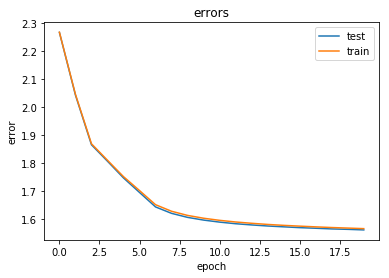

In [9]:
utils.plot_graphs(err_log, 'loss')

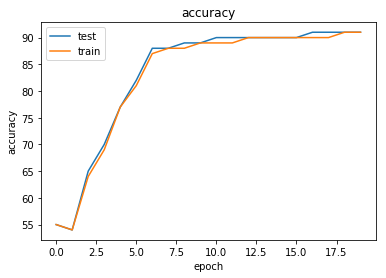

In [10]:
utils.plot_graphs(err_log, 'accuracy')

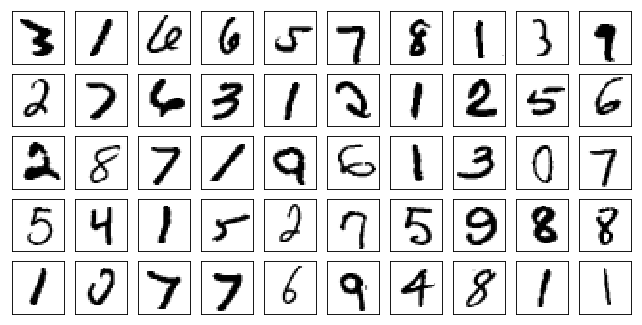

[[3 1 2 6 2 7 8 1 3 9]
 [2 7 6 3 1 2 1 2 5 6]
 [2 8 7 1 9 6 1 3 0 7]
 [5 4 1 8 2 9 5 8 8 8]
 [1 0 7 7 6 9 4 8 1 1]]


In [11]:
utils.plot_results(model, train_loader, (5, 10))